pygame 2.5.0 (SDL 2.28.0, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
Device:  cuda


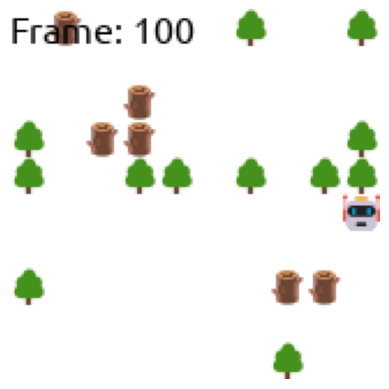

In [1]:
import torch
from gridworld.agent import Agent
from gridworld.rendering import run_simulation_with_rendering
from models.ann import DeepQNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: ', device)

agent = Agent()

model_filename = 'policy_2023-07-18_13-15.pth'
loaded_policy = DeepQNet()
loaded_policy.load_state_dict(torch.load(model_filename))
loaded_policy = loaded_policy.to(device)

duration = run_simulation_with_rendering(loaded_policy, device, file_name='simuation.gif');